<br>
<center><font color='tomato' size="8px"><b><u>SPARKS FOUNDATION</u><b/></font></center>


# <center>Data Science and Business Analytics Internship<center/>

<font size="4px" font-family="TimesNewRoman">
Name: <font color='blue'>Biginepall Nagasai </font> <br><br>
Task-2: <font color='blue'>Prediction Using Unsupervised Machine Learning</font> <br><br>
Problem Statment: <font color='blue'>Predicting Optimal Number of Clusters in the provided Iris Dataset and visualizing the clusters</font>
    </font>

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
%matplotlib inline

## Retrieving required data present in the dataset

In [2]:
df=pd.read_csv('Iris.csv')
df=df.drop(['Id','Species'],axis=1)

## First five Rows of the data

In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Checking Whether  the dataset contain any Null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


## Statistical Analysis on the dataset

In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualizing the dataset using parplot

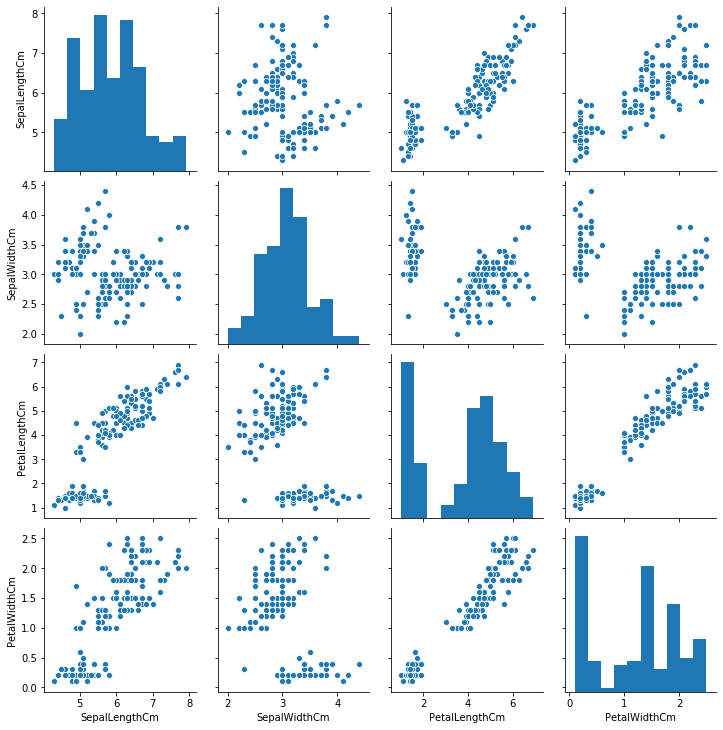

In [6]:
sns.pairplot(df)
plt.show()

## CoRelation Matrix

In [7]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


## Finding Optimal Number of Clusters

In [8]:
x=df.values
sum_of_squared_distances=[]
for i in range(1,16):
    model=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=15,random_state=0)
    model.fit(x)
    sum_of_squared_distances.append(model.inertia_)

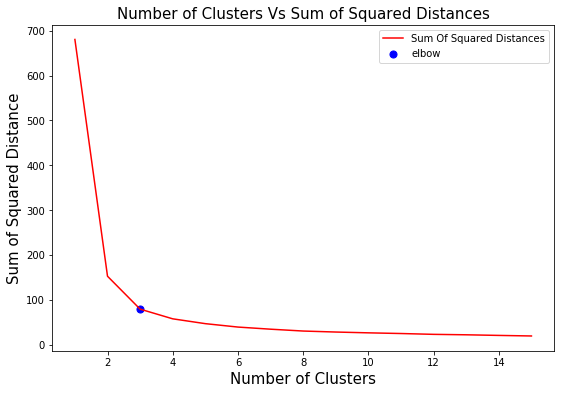

In [9]:
plt.figure(figsize=(9,6))
plt.plot(range(1,16),sum_of_squared_distances,label='Sum Of Squared Distances',color='red')
plt.scatter([3],[sum_of_squared_distances[2]],color='blue',label="elbow",s=50)
plt.xlabel('Number of Clusters',fontsize=15)
plt.ylabel('Sum of Squared Distance',fontsize=15)
plt.title('Number of Clusters Vs Sum of Squared Distances',fontsize=15)
plt.legend()
plt.show()

#### From the graph it is clear that the optimal number of clusters are 3

## Visualizing 3 clusters with respect to Sepal Length and Sepal Width

In [10]:
model=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=15,random_state=0)
clusters=model.fit_predict(x)

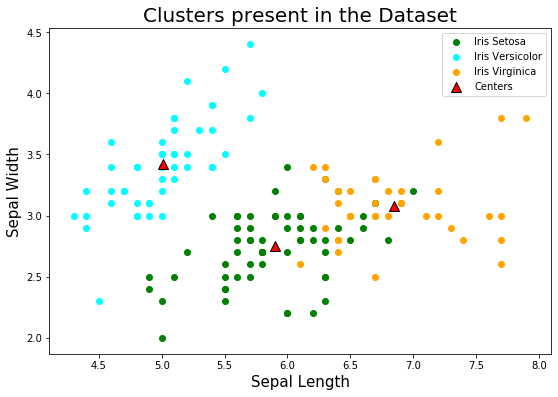

In [11]:
plt.figure(figsize=(9,6))
plt.scatter(x[clusters==0,0],x[clusters==0,1],color='green',label='Iris Setosa')
plt.scatter(x[clusters==1,0],x[clusters==1,1],color='cyan',label='Iris Versicolor')
plt.scatter(x[clusters==2,0],x[clusters==2,1],color='orange',label='Iris Virginica')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='red',marker='^',label='Centers',s=100,edgecolor='black')
plt.xlabel('Sepal Length',fontsize=15)
plt.ylabel('Sepal Width',fontsize=15)
plt.title('Clusters present in the Dataset',fontsize=20)
plt.legend()
plt.show()

## Adding Cluster numbers to the DataFrame

In [12]:
df['labels']=clusters

## Adding Centroid values  to the DataSet 

In [13]:
centroids=pd.DataFrame(model.cluster_centers_)
centroids_label=pd.DataFrame(np.array([[3],[3],[3]]))
centroids=pd.concat([centroids,centroids_label],axis=1)
centroids.columns=df.columns
df=pd.concat([df,centroids],axis=0,ignore_index=True)

## Changing Cluster Numbers to Species Names

In [14]:
species_dict={0:'Iris Setosa',1:'Iris VersiColor',2:'Iris Virginca',3:'Centroids'}
df['labels']=df.labels.apply(lambda i:species_dict[i])

## Visualizing Clusters with respect to every Feature

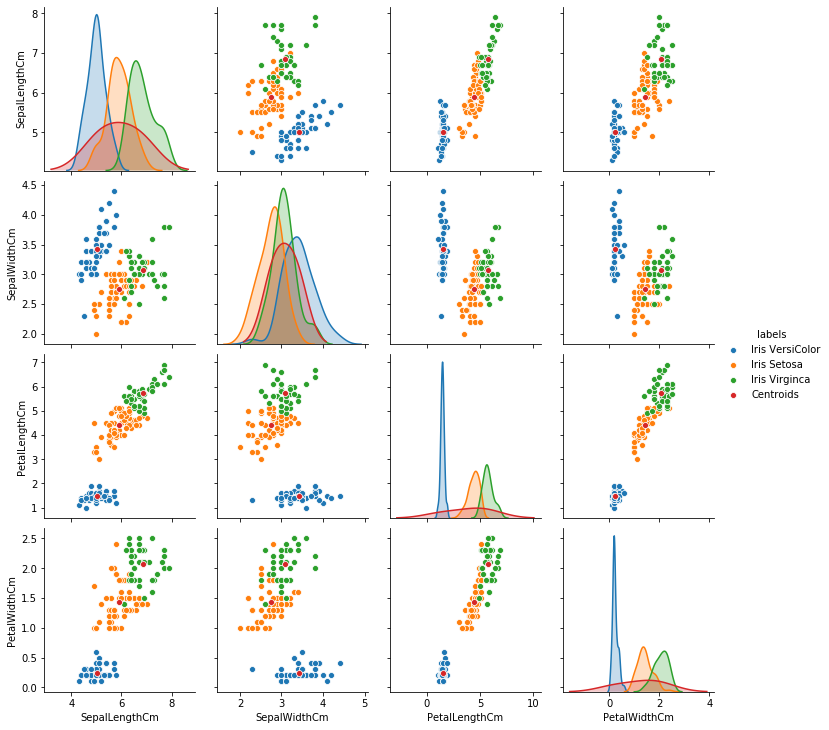

In [15]:
sns.pairplot(df,hue='labels')
plt.show()

# Conclusion
## Given Iris Dataset Contains 3 Optimal Clusters